In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [3]:
#sample text on chocoloates 

file_path = 'chocolates.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [4]:
#Tokenization
tokens = word_tokenize(text)

#Lower case conversion
tokens_lower = [token.lower() for token in tokens]

#Stop Words removal
stop_words = set(stopwords.words('english'))
tokens_filtered = [token for token in tokens_lower if token not in stop_words]

#Stemming 
stemmer = PorterStemmer()
tokens_stemmed = [stemmer.stem(token) for token in tokens_filtered]

#Lemmitization
lemmatizer = WordNetLemmatizer()
tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens_filtered]

#POS Tagging 
pos_tags = nltk.pos_tag(tokens_filtered)
print('POS Tags:', pos_tags)

# Named Entity Recognition (NER)
entities = nltk.ne_chunk(nltk.pos_tag(tokens))

POS Tags: [('chocolates', 'NNS'), ('undeniably', 'RB'), ('delightful', 'JJ'), ('confections', 'NNS'), ('cherished', 'VBN'), ('individuals', 'NNS'), ('ages', 'NNS'), ('across', 'IN'), ('globe', 'NN'), ('.', '.'), ('delectable', 'JJ'), ('treats', 'NNS'), (',', ','), ('originating', 'VBG'), ('cocoa', 'NN'), ('bean', 'NN'), (',', ','), ('evolved', 'VBD'), ('array', 'NN'), ('irresistible', 'JJ'), ('forms', 'NNS'), ('flavors', 'NNS'), (',', ','), ('captivating', 'VBG'), ('taste', 'NN'), ('buds', 'NNS'), ('chocolate', 'VBP'), ('enthusiasts', 'NNS'), ('worldwide', 'RB'), ('.', '.'), ('rich', 'JJ'), ('creamy', 'JJ'), ('texture', 'NN'), ('milk', 'NN'), ('chocolate', 'NN'), ('intense', 'JJ'), ('bittersweet', 'NN'), ('notes', 'NNS'), ('dark', 'JJ'), ('chocolate', 'NN'), (',', ','), ('exists', 'VBZ'), ('diverse', 'JJ'), ('spectrum', 'NN'), ('chocolate', 'NN'), ('varieties', 'NNS'), ('indulge', 'VBP'), ('.', '.'), ('whether', 'IN'), ('savoring', 'VBG'), ('smooth', 'JJ'), ('velvety', 'NN'), ('sweetne

In [5]:
# Define chunking grammar
grammar = r"""
    NP: {<DT>?<JJ>*<NN>}     # Chunk noun phrases (optional determiner, adjectives, noun)
    VP: {<VB.*><NP|PP>*}     # Chunk verb phrases (verbs followed by noun phrases or prepositional phrases)
"""

# Create chunk parser
chunk_parser = nltk.RegexpParser(grammar)

# Apply chunking
chunks = chunk_parser.parse(pos_tags)

# Define chinking grammar
chinked_grammar = r"""
    NP:
        {<.*>+}                # Chunk everything
        }<VB.*|IN|DT|TO>{      # Chink verbs, prepositions, determiners, and "to" particles
"""

# Create chinker
chinker = nltk.RegexpParser(chinked_grammar)

# Apply chinking
chinked_chunks = chinker.parse(pos_tags)

Frequency Distribution: [(',', 25), ('.', 12), ('chocolate', 10), ('chocolates', 8), ('delectable', 3), ('indulgence', 3), ('health', 3), ('ages', 2), ('flavors', 2), ('taste', 2), ('buds', 2), ('rich', 2), ('dark', 2), ('diverse', 2), ('whether', 2), ('cultural', 2), ('joy', 2), ('appeal', 2), ('also', 2), ('undeniably', 1), ('delightful', 1), ('confections', 1), ('cherished', 1), ('individuals', 1), ('across', 1), ('globe', 1), ('treats', 1), ('originating', 1), ('cocoa', 1), ('bean', 1), ('evolved', 1), ('array', 1), ('irresistible', 1), ('forms', 1), ('captivating', 1), ('enthusiasts', 1), ('worldwide', 1), ('creamy', 1), ('texture', 1), ('milk', 1), ('intense', 1), ('bittersweet', 1), ('notes', 1), ('exists', 1), ('spectrum', 1), ('varieties', 1), ('indulge', 1), ('savoring', 1), ('smooth', 1), ('velvety', 1), ('sweetness', 1), ('white', 1), ('delighting', 1), ('decadent', 1), ('richness', 1), ('truffles', 1), ('bite', 1), ('offers', 1), ('sensorial', 1), ('experience', 1), ('unli

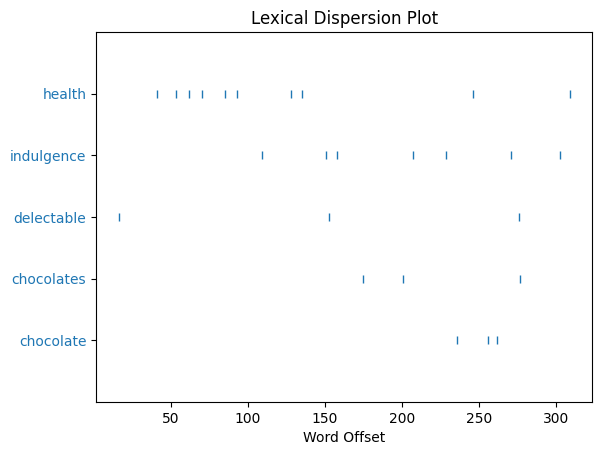

In [9]:
# Making a Dispersion Plot
dispersion_plot = nltk.Text(tokens)
dispersion_plot.dispersion_plot(["chocolate", "chocolates", 'delectable', 'indulgence', 'health'])

# Making a Frequency Distribution
freq_dist = nltk.FreqDist(tokens_filtered)
print("Frequency Distribution:", freq_dist.most_common())

# Parse tree or Syntax Tree generation
def get_parse_tree(sent):
    return nltk.Tree.fromstring(sent)

parse_tree = get_parse_tree('(S (NP Chocolates) (VP are (Adj delicious) (N treats)))')
print(parse_tree)